**Introduction to deep learning and Neural networks**

In this notebook there are various concepts covered like:
* Dense
* fit
* predict
* epoch
* flatten
* activation function
* optimization
* loss
* Early Stopping(in-build and Custom)

In [97]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Data Creation

In [98]:
x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0])
y = (x * 2) - 1
print(x)
print(y)

[-1.  0.  1.  2.  3.  4.]
[-3. -1.  1.  3.  5.  7.]


Initializing and Compiling a Simple Neural Network Model with TensorFlow/Keras

In [99]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(units=3),
    tf.keras.layers.Dense(units=1),
])
model.compile(optimizer='sgd',loss='mean_squared_error')

Train Model

In [100]:
model.fit(x,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 451ms/step - loss: 71.3431
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 26.1028
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 16.7002
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.6119
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 8.1292
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 5.5861
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 3.7784
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 2.5842
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 1.8605
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 1.4512
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 1.2249
Epoch 12/100
1/1 [==============================] - 0s 0s/step - loss: 1.0933
Epoch 13/100
1/1 [==============================] - 0s 1

Inference

In [101]:
model.predict(np.array([15.0]),verbose=0)

array([[28.766314]], dtype=float32)

Training Fashion Dataset using tensorflow

In [102]:
fashion_mnst = tf.keras.datasets.fashion_mnist

In [103]:
(train_data,train_label),(test_data,test_label) = fashion_mnst.load_data()

In [104]:
original_lables = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [105]:
test_label

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [106]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [115]:
train_label[1]

0

In [119]:
original_lables[train_label[0]]

'Ankle boot'

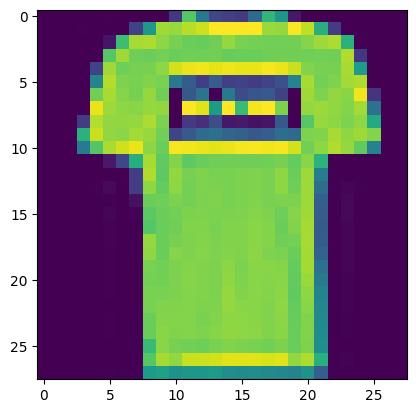

In [116]:
plt.imshow(train_data[1])

Function to display images

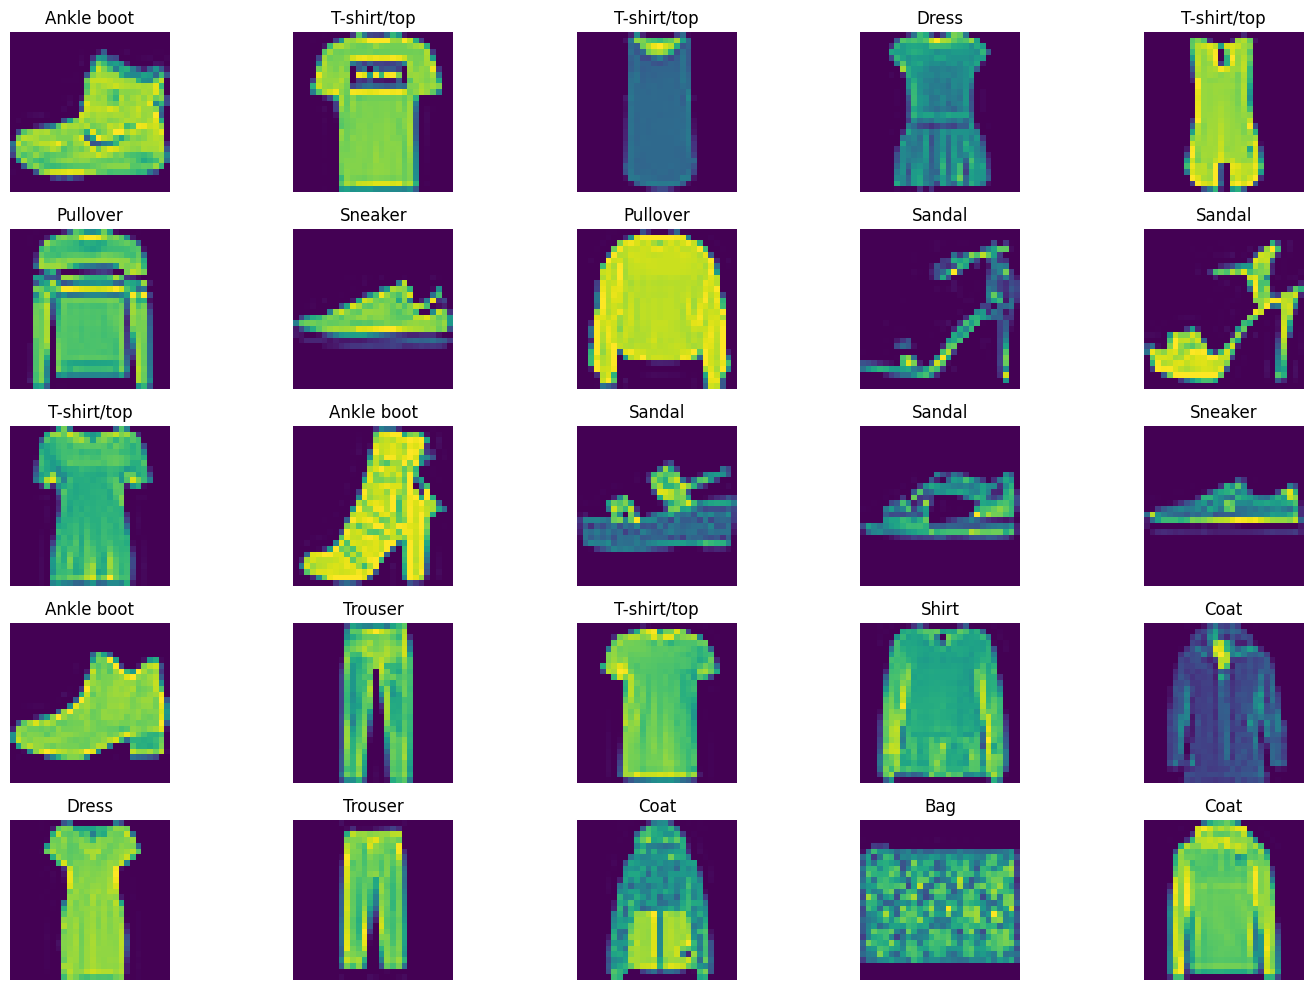

In [127]:
def display_images(img,label):
    plt.figure(figsize=(15,10))
    for i in range(0,25):
        plt.subplot(5, 5, i+1)
        plt.imshow(img[i])
        plt.title(f"{original_lables[label[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
display_images(train_data,train_label)

In [14]:
train_data[0].shape

(28, 28)

In [12]:
train_data.shape

(60000, 28, 28)

Initialize and Compile model

In [48]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax),
])
model.compile(optimizer='SGD',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [44]:
# dir(tf.keras.optimizers.Optimizer(name='BGD'))

Fit training images data into the model

In [50]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',       #Metric to monitor
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    min_delta=0.001,      # Minimum change to qualify as an improvement
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)
model.fit(x=train_data,y=train_label,epochs=100,callbacks=[early_stopping])

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 72.8932 - accuracy: 0.1000
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2640 - accuracy: 0.1164
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2326 - accuracy: 0.1333
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2317 - accuracy: 0.1323
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2593 - accuracy: 0.1238
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2988 - accuracy: 0.1015


In [51]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [52]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax),
])
model.compile(optimizer='sgd',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [53]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',       #Metric to monitor
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    min_delta=0.001,      # Minimum change to qualify as an improvement
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)
model.fit(x=train_data,y=train_label,epochs=100,callbacks=[early_stopping])

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7423 - accuracy: 0.7594
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5131 - accuracy: 0.8267
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4676 - accuracy: 0.8400
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4424 - accuracy: 0.8472
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4240 - accuracy: 0.8540
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4101 - accuracy: 0.8579
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3983 - accuracy: 0.8616
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3888 - accuracy: 0.8651
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3799 - accuracy: 0.8687
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

In [ ]:
model.predict(test_data)

313/313 [==============================] - 1s 1ms/step


array([[0.10004804, 0.09993018, 0.10023187, ..., 0.10052655, 0.10107006,
        0.10020333],
       [0.10004804, 0.09993018, 0.10023187, ..., 0.10052655, 0.10107006,
        0.10020333],
       [0.10004804, 0.09993018, 0.10023187, ..., 0.10052655, 0.10107006,
        0.10020333],
       ...,
       [0.10004804, 0.09993018, 0.10023187, ..., 0.10052655, 0.10107006,
        0.10020333],
       [0.10004804, 0.09993018, 0.10023187, ..., 0.10052655, 0.10107006,
        0.10020333],
       [0.10004804, 0.09993018, 0.10023187, ..., 0.10052655, 0.10107006,
        0.10020333]], dtype=float32)

In [ ]:
model.evaluate?

In [ ]:
loss = model.evaluate(test_data,test_label)

313/313 [==============================] - 1s 2ms/step - loss: 2.3026


In [ ]:
loss

2.302637815475464

In [ ]:
# train_data = train_data / 255.0
# test_data = test_data / 255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax),
])
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.01,patience=3,restore_best_weights=True)
model.fit(train_data,train_label,epochs=100,callbacks=early_stopping)

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1911
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1904
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1896
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1884


Custom Callback

In [ ]:
class CustomCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['loss'] < 0.3:
            print(f"\nloss is low {logs['loss']},so cancelling training")
            self.model.stop_training = True

In [ ]:
model.fit(train_data,train_label,epochs=100,callbacks=[CustomCallBack()])

Epoch 1/100
1859/1875 [============================>.] - ETA: 0s - loss: 0.1808
loss is low 0.18093590438365936,so cancelling training
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1809


In [54]:
prediction = model.predict(test_data)

313/313 [==============================] - 1s 1ms/step


In [58]:
np.unique(test_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [62]:
prediction.shape

(10000, 10)

In [59]:
predicted_class = np.argmax(prediction,axis=1)

In [61]:
predicted_class.shape

(10000,)

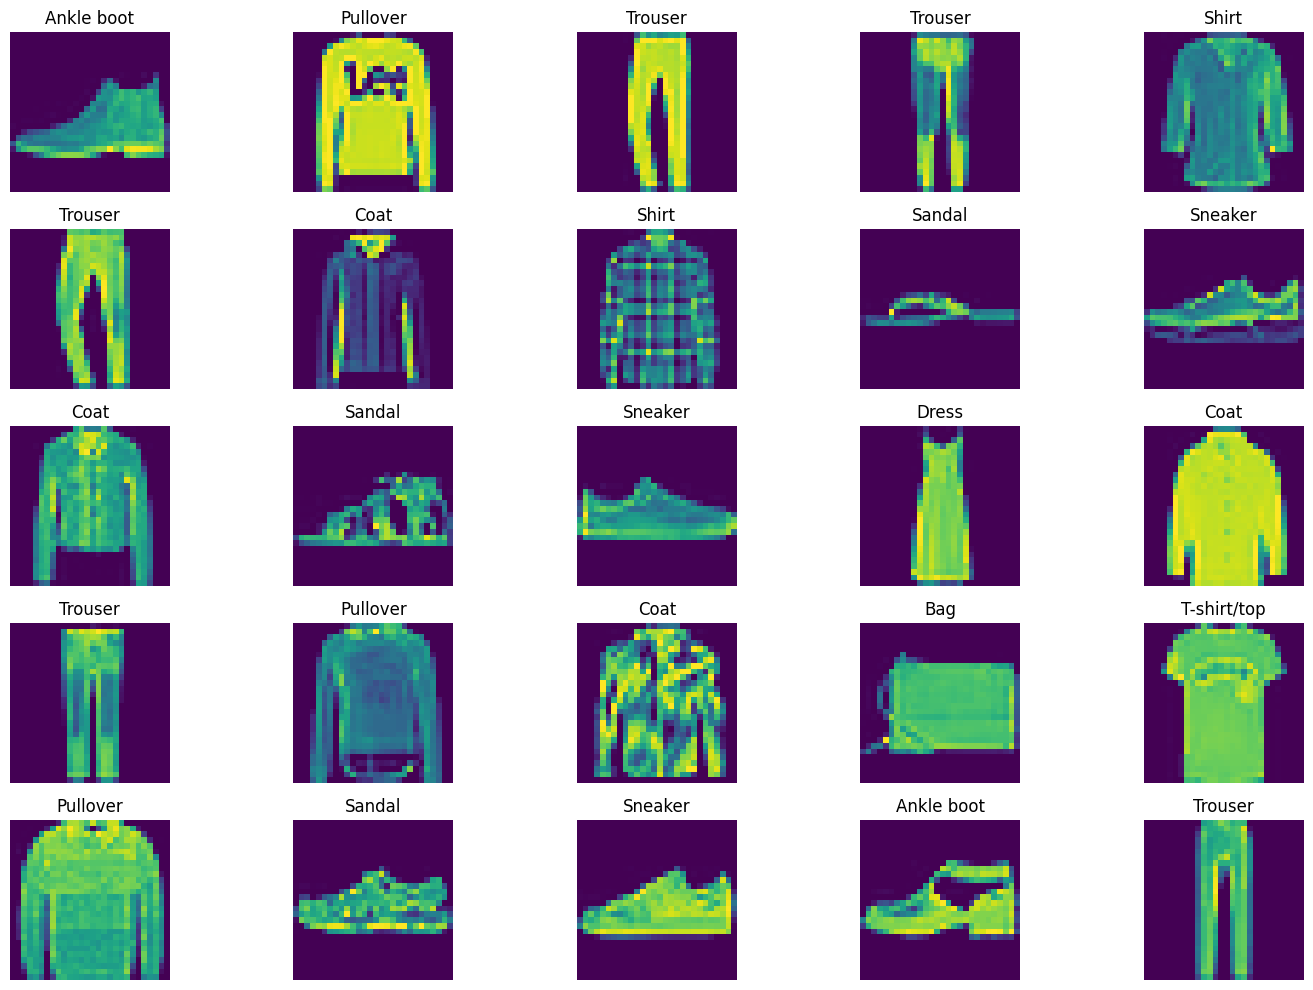

In [129]:
display_images(test_data,test_label)